# EVN

In [156]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# 단어 긍정(2), 중립(1), 부정(0) 분류 프로젝트

## 데이터

In [125]:
import numpy as np


# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답
labels = [[1, 1, 1, 2],
          [1, 1, 0]]  # 긍정(2), 중립(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '중립', 2: '긍정'}

## Vocabulary

for sentence in sentences:
  print(sentence.split())
  words.extend(sentence.split())
words

In [126]:
# 각 문장을 띄어쓰기 단위로 분할
words = []
for sentence in sentences:
    words.extend(sentence.split())
words

 


['나는', '오늘', '기분이', '좋아', '나는', '오늘', '우울해']

In [127]:
# 중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [128]:
# 각 단어별 고유한 번호 부여
word_to_id = {'[PAD]': 0, '[UNK]': 1}  # PAD 길이를 조절할때, UNK vocab에 없는 단어
for word in words:
    word_to_id[word] = len(word_to_id)
word_to_id

{'[PAD]': 0, '[UNK]': 1, '기분이': 4, '나는': 2, '오늘': 3, '우울해': 6, '좋아': 5}

In [129]:
# 각 숫자별 단어 부여
id_to_word = {_id:word for word, _id in word_to_id.items()}
id_to_word

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [130]:
train_inputs = []
for sentence in sentences:
    train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [131]:
for row in train_inputs:
    row += [0] * (4 - len(row))
train_inputs

[[2, 3, 4, 5], [2, 3, 6, 0]]

In [132]:
# train inputs을 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [133]:
# train label은 labels를 그래도 사용
train_labels = labels
train_labels

[[1, 1, 1, 2], [1, 1, 0]]

In [134]:
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [135]:
for row in train_labels:
    row += [1] * (4 - len(row))
train_labels

[[1, 1, 1, 2], [1, 1, 0, 1]]

In [136]:
# train inputs을 numpy array로 변환
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [137]:
# 학습용 정답을 numpy array로 변환
train_labels = np.array(train_labels)
train_labels

array([[1, 1, 1, 2],
       [1, 1, 0, 1]])

## 모델링

확률을 구하는데 있어서 기대값에 대한 총값과, 해당 값에 대한 기대값을 나누어 정확도를 구한다.

In [161]:
# 입력 단어를 vector로 변환

embedding = tf.keras.layers.Embedding(len(word_to_id), 8)  # n_vocab, d_model
hidden = embedding(train_inputs)
hidden

[[2 3 4 5]
 [2 3 6 0]]


<tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
array([[[-4.7644377e-03, -4.5333233e-02, -1.9259656e-02, -2.5622249e-03,
          2.6105572e-02,  3.6968742e-02, -2.4175752e-02,  3.7615862e-02],
        [ 1.9223500e-02,  2.7200412e-02,  7.1770921e-03,  2.6911620e-02,
          1.3782371e-02, -4.7633946e-02,  2.6564788e-02,  1.5555505e-02],
        [-9.9597089e-03,  1.3300959e-02, -4.3374062e-02,  8.6968429e-03,
          1.2421560e-02,  1.7314147e-02,  3.0319009e-02, -5.4306611e-03],
        [-1.0703482e-02,  1.2618337e-02,  3.6940549e-02, -4.8270907e-02,
         -4.0209580e-02, -4.2196620e-02, -2.4470020e-02, -2.7397741e-02]],

       [[-4.7644377e-03, -4.5333233e-02, -1.9259656e-02, -2.5622249e-03,
          2.6105572e-02,  3.6968742e-02, -2.4175752e-02,  3.7615862e-02],
        [ 1.9223500e-02,  2.7200412e-02,  7.1770921e-03,  2.6911620e-02,
          1.3782371e-02, -4.7633946e-02,  2.6564788e-02,  1.5555505e-02],
        [-2.0948982e-02,  2.8423261e-02, -4.1502345e-02,  2.86122

In [139]:
# 단어의 vector를 이용해서 긍정(2), 부정(0), 중립(1) 확률값 예측
linear = tf.keras.layers.Dense(3, activation=tf.nn.softmax)
outputs = linear(hidden)
outputs

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[0.3279539 , 0.32640067, 0.34564543],
        [0.32938257, 0.33091727, 0.33970025],
        [0.34017187, 0.3440822 , 0.3157459 ],
        [0.3166177 , 0.33702165, 0.3463606 ]],

       [[0.3279539 , 0.32640067, 0.34564543],
        [0.32938257, 0.33091727, 0.33970025],
        [0.33782947, 0.33853984, 0.32363072],
        [0.32141575, 0.3322954 , 0.34628886]]], dtype=float32)>

In [140]:
linear_2 = tf.keras.layers.Dense(3)

logits = linear_2(hidden)
logits

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[-0.00411454, -0.00876172,  0.00737561],
        [-0.0393246 ,  0.0207276 ,  0.00315583],
        [-0.02573631,  0.03529714,  0.00157551],
        [ 0.00629773,  0.03066701, -0.01681382]],

       [[-0.00411454, -0.00876172,  0.00737561],
        [-0.0393246 ,  0.0207276 ,  0.00315583],
        [ 0.08563501,  0.03697699,  0.04093788],
        [-0.03242736, -0.0265842 , -0.02503041]]], dtype=float32)>

In [141]:
numerator = np.exp(logits)
denominator = np.sum(numerator, axis = 2, keepdims=True)

numerator, denominator

(array([[[0.99589396, 0.9912765 , 1.0074029 ],
         [0.96143854, 1.0209439 , 1.0031608 ],
         [0.97459203, 1.0359274 , 1.0015768 ],
         [1.0063176 , 1.0311421 , 0.9833268 ]],
 
        [[0.99589396, 0.9912765 , 1.0074029 ],
         [0.96143854, 1.0209439 , 1.0031608 ],
         [1.0894086 , 1.0376691 , 1.0417874 ],
         [0.96809274, 0.9737661 , 0.9752803 ]]], dtype=float32),
 array([[[2.9945734],
         [2.9855433],
         [3.0120964],
         [3.0207868]],
 
        [[2.9945734],
         [2.9855433],
         [3.168865 ],
         [2.917139 ]]], dtype=float32))

In [142]:
#두 결과값을 나눠서, softmax 계산을 준비하기.

probs = numerator / denominator
probs

array([[[0.33256623, 0.3310243 , 0.33640948],
        [0.32203135, 0.34196252, 0.33600613],
        [0.32355937, 0.3439224 , 0.33251816],
        [0.33313096, 0.34134886, 0.3255201 ]],

       [[0.33256623, 0.3310243 , 0.33640948],
        [0.32203135, 0.34196252, 0.33600613],
        [0.34378514, 0.32745764, 0.32875726],
        [0.33186376, 0.3338086 , 0.33432767]]], dtype=float32)

In [143]:
weight, bias = linear_2.get_weights()
weight, bias

(array([[ 0.35378116, -0.0252772 ,  0.56295973],
        [ 0.42636365,  0.23821002,  0.41853315],
        [-0.6952962 ,  0.01199692,  0.18669635],
        [-0.720001  , -0.05345589, -0.64229923],
        [ 0.13964099,  0.7235163 ,  0.2792868 ],
        [-0.49402207, -0.50008273, -0.53789604],
        [-0.4460153 , -0.6014691 , -0.16857857],
        [ 0.1350348 ,  0.0303461 , -0.5439788 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32))

In [144]:
logits = np.matmul(hidden, weight) + bias
logits

array([[[-0.00411455, -0.00876172,  0.00737561],
        [-0.0393246 ,  0.0207276 ,  0.00315583],
        [-0.02573631,  0.03529714,  0.00157551],
        [ 0.00629773,  0.03066701, -0.01681382]],

       [[-0.00411455, -0.00876172,  0.00737561],
        [-0.0393246 ,  0.0207276 ,  0.00315583],
        [ 0.08563501,  0.03697699,  0.04093788],
        [-0.03242736, -0.0265842 , -0.0250304 ]]], dtype=float32)

In [145]:
def build_model(n_vocab, d_model, n_seq, n_out):
    """
    동작만 하는 간단한 모델
    :param n_vocab: vocabulary 단어 수
    :param d_model: 단어를 의미하는 벡터의 차원 수
    :param n_seq: 문장길이 (단어 수)
    :param n_out: 예측할 class 개수
    """
    inputs = tf.keras.layers.Input((n_seq,))  # (bs, n_seq)

    # 입력 단어를 vector로 변환
    embedding = tf.keras.layers.Embedding(n_vocab, d_model)
    hidden = embedding(inputs)  # (bs, n_seq, d_model)
    # 단어의 vector를 이용해서 정답 확률값 예측
    linear = tf.keras.layers.Dense(n_out, activation=tf.nn.softmax)
    outputs = linear(hidden)  # (bs, n_seq, n_out)
    
    # 학습할 모델 선언
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

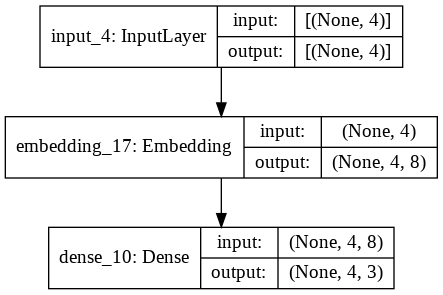

In [146]:
model = build_model(len(word_to_id), 8, 4, 3)
# 모델 내용 그래프 출력
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

## 학습

In [147]:
# 모델 loss, optimizer, metric 정의
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [148]:
history = model.fit(train_inputs, train_labels, epochs=100, batch_size=16)

Epoch 1/100
1/1 [==============================] - 0s 492ms/step - loss: 1.0909 - accuracy: 0.3750
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0875 - accuracy: 0.3750
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0841 - accuracy: 0.3750
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0807 - accuracy: 0.3750
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0773 - accuracy: 0.3750
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0740 - accuracy: 0.3750
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0706 - accuracy: 0.6250
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0673 - accuracy: 0.6250
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0639 - accuracy: 0.6250
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0606 - accuracy: 0.6250
Epoch 11/100
1/1 [=========

## 평가

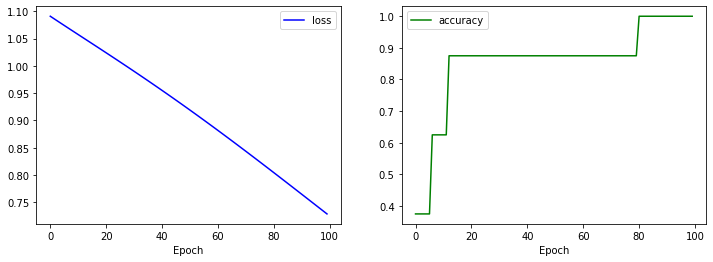

In [149]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## 예측

In [150]:
string = '나는 기분이 우울해'

In [151]:
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [152]:
infer_input += [0] * (4 - len(infer_input))
infer_input

[2, 4, 6, 0]

In [153]:
infer_inputs = np.array([infer_input])
infer_inputs

array([[2, 4, 6, 0]])

In [154]:
y_preds = model.predict(infer_inputs)
y_preds

array([[[0.2225743 , 0.4990758 , 0.27834994],
        [0.19143005, 0.53338975, 0.27518016],
        [0.47290918, 0.28479242, 0.2422983 ],
        [0.20647173, 0.51462483, 0.27890342]]], dtype=float32)

In [155]:
y_pred_class = np.argmax(y_preds, axis=2)
y_pred_class

array([[1, 1, 0, 1]])

과제. 